# Insper - Ciências dos Dados

### Projeto 1

### João Pedro Chacon Ruiz

### Turma A

<img src="NEA_logo.jpg" width=(2108) height=(1020) align=center> 
<h3 align="center">Figura 1: Logo da NEA</h3> 

## • Introdução •

A Agência de Energia Nuclear (ou NEA, sigla em inglês) é uma organização intergovernamental organizada pela OECD e cujo objetivo é ajudar os países membros a manter e incentivá-los a desenvolver e usufruir cada vez mais da energia nuclear de forma segura e ambieltalmente correta. 

A NEA é composta por 33 países espalhados pelos continentes, dentre os quais estão os EUA, a França, a Alemanha e outras potências mundias. Juntos, os países membros são responsáveis por aproximadamente 85% da energia nuclear no mundo.

## • Hipótese e mecanismo •

Tendo em vista a relevância que os países membros da NEA tem para a energia nuclear mundial, a hipótese é que países que entram na NEA aumentam significantemente a sua produção de energia nuclear.

Para tentar validar tal hipótese, serão analisados dados do Japão, que entrou na NEA em 1972, e do Canadá, que ingressou em 1975, em comparação com dados de um país não integrante da organização. A escolha do Japão e do Canadá como países a serem analisados na validação pode ser justificada por dois motivos principais:

> Data de ingresso muito próxima, com 3 anos de diferença;

> Valores de produção de energia nuclear no início do período analisado próximos.

Quanto ao país que será usado para comparação, o escohido foi a Índia por alguns fatores. Dentre os países não integrantes:

> É um dos poucos que tem dados desde 1971;

> É o país que tem a quantia de energia nuclear produzida mais próxima às quantias do Japão e do Canadá. 

Vale notar que parte dos dados utilizados são da década de 1970, um período marcado pela crise do petróleo, o que pode influenciar diretamente a análise de resultados, já ambos estão relacionandos a formas de obtenção de energia. Por isso, ao longo do projeto o impacto da crise do petróleo também será analisada.

## • Imports •

In [377]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

## • Filtragem e leitura de dados •

**Dados sobre a produção de energia nuclear de cada país por ano (TOE)**

In [392]:
dados_nuclear = pd.read_excel('nuclear_energy.xlsx')
dados_nuclear.head(3)

,"Nuclear production, total (toe)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
nuclear = dados_nuclear.set_index('Nuclear production, total (toe)')
nuclear.index.names = ['country']
nuclear = nuclear.iloc[:,11:25]
nuclear

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Algeria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
nuclear = nuclear[~nuclear[1971].isin(['NaN'])]
nuclear = nuclear.sort_values(by=1971, ascending=False)
nuclear

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
United States,3.486844e+06,4.971023e+06,7.666982e+06,1.042571e+07,1.577919e+07,1.741788e+07,2.286638e+07,2.519235e+07,2.325572e+07,2.288762e+07,2.485245e+07,2.577291e+07,2.676681e+07,2.986174e+07
United Kingdom,2.368702e+06,2.526053e+06,2.407309e+06,2.890542e+06,2.608598e+06,3.108770e+06,3.441187e+06,3.200688e+06,3.293895e+06,3.183405e+06,3.264746e+06,3.780911e+06,4.293035e+06,4.641359e+06
France,8.027515e+05,1.254686e+06,1.267498e+06,1.263543e+06,1.569046e+06,1.356664e+06,1.546518e+06,2.621066e+06,3.435942e+06,5.266638e+06,9.056406e+06,9.365348e+06,1.240421e+07,1.644316e+07
Japan,6.878762e+05,8.168530e+05,8.346518e+05,1.693809e+06,2.160361e+06,2.930267e+06,2.722184e+06,5.100000e+06,6.052709e+06,7.101548e+06,7.551161e+06,8.807395e+06,9.827257e+06,1.154463e+07
Germany,5.344798e+05,8.187446e+05,1.040929e+06,1.243250e+06,2.075494e+06,2.539381e+06,3.547291e+06,3.772399e+06,4.476698e+06,4.779794e+06,5.634824e+06,6.399484e+06,6.712210e+06,8.969647e+06
Canada,3.668960e+05,6.200344e+05,1.311608e+06,1.263629e+06,1.080825e+06,1.497506e+06,2.265004e+06,2.682889e+06,3.032760e+06,3.270163e+06,3.445142e+06,3.296389e+06,4.179708e+06,4.489252e+06
Italy,2.893379e+05,3.117799e+05,2.701634e+05,2.932072e+05,3.267412e+05,3.273431e+05,2.910576e+05,3.807395e+05,2.259673e+05,1.898538e+05,2.327601e+05,5.850387e+05,4.972485e+05,5.921754e+05
Spain,2.169390e+05,4.085125e+05,5.627687e+05,6.210662e+05,6.486672e+05,6.496131e+05,5.609630e+05,6.576956e+05,5.760963e+05,4.459157e+05,8.226999e+05,7.541702e+05,9.166810e+05,1.985039e+06
Switzerland,1.196045e+05,3.301806e+05,5.425623e+05,6.076526e+05,6.673259e+05,6.826311e+05,6.976784e+05,7.218401e+05,1.015047e+06,1.233534e+06,1.318143e+06,1.301204e+06,1.350817e+06,1.585555e+06


In [381]:
nuclear = nuclear.loc[['Canada','Japan','India']]
nuclear

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Canada,366895.958727,620034.393809,1.311608e+06,1.263629e+06,1.080825e+06,1.497506e+06,2.265004e+06,2.682889e+06,3.032760e+06,3.270163e+06,3.445142e+06,3.296389e+06,4.179708e+06,4.489252e+06
Japan,687876.182287,816852.966466,8.346518e+05,1.693809e+06,2.160361e+06,2.930267e+06,2.722184e+06,5.100000e+06,6.052709e+06,7.101548e+06,7.551161e+06,8.807395e+06,9.827257e+06,1.154463e+07
India,102321.582115,97420.464316,2.060189e+05,1.896819e+05,2.257954e+05,2.796217e+05,1.953568e+05,2.381771e+05,2.473775e+05,2.580396e+05,2.597592e+05,1.738607e+05,3.049011e+05,3.503869e+05


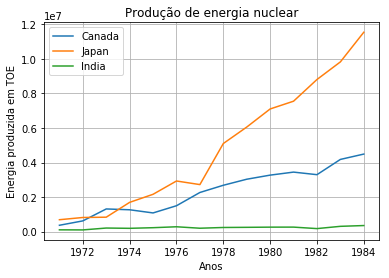

In [382]:
plt.plot(nuclear.loc['Canada'], label = 'Canada')
plt.plot(nuclear.loc['Japan'], label = 'Japan')
plt.plot(nuclear.loc['India'], label = 'India')
plt.title('Produção de energia nuclear')
plt.xlabel('Anos')
plt.ylabel('Energia produzida em TOE')
plt.grid(True)
plt.legend()

Como pode ser observado no gráfico, a produção no Japão começou a crescer de forma significante a partir de 1973, um ano depois de seu ingresso, e a do Canadá passou a crescer no próprio ano de ingresso, 1975. Por outro lado, a Índia, que não entrou na NEA, manteve sua produção quase que de forma estável. Analisando essa variável isoladamente, a hipótese parece ser correta, mas outras informações precisam ser levadas em conta.

**Dados sobre a produção de energia a partir de petróleo (TOE)**

In [383]:
dados_oil = pd.read_excel('oil_energy.xlsx')
dados_oil.head(3)

,Oil Consumption total (tonnes per year),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000,1693000,1578000,1682000,1775000,2032000,2288000,2514000,2739000,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000,22678000,23224000,23733000,24671000,21942000,23491000,23162000,23189000,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN
2,Australia,16902000,18120000,19812000,21892000,23425000,24451000,25803000,25784000,28206000,...,37970000,38275000,38791278,39838432,41414188,41732248,42461108,42200000.0,42600000.0,NaN


In [384]:
oil = dados_oil.set_index('Oil Consumption total (tonnes per year)')
oil.index.names = ['country']
oil = oil.iloc[:,6:20]
oil

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Algeria,2288000,2514000,2739000,3036000,3378000,3877000,4400000,4521000,5420000,5469000,5889000,6245000,7011000,7760000
Argentina,23491000,23162000,23189000,23125000,21912000,22901000,23963000,23384000,25229000,22920000,21598000,20919000,21151000,21053000
Australia,25803000,25784000,28206000,29042000,28581000,29770000,31017000,30794000,31269000,29691000,29216000,28416000,27260000,28503000
Austria,10127000,10923000,11831000,10581000,10682000,11617000,11107000,11998000,12504000,12188000,11046000,10469000,10113000,9820000
Azerbaijan,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Bangladesh,-,757000,876000,967000,1119000,1207000,1187000,1286000,1419000,1592000,1603000,1467000,1336000,1588000
Belarus,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Brazil,27956617,32147765,39803983,42979446,44451496,47899835,49259178,54222043,57661934,56375581,53851339,54758250,53257560,54457372
Bulgaria,9889000,10282000,10849000,11284000,11965000,12431000,12927000,13315000,13726000,13972000,12457000,12064000,11634000,11167000


In [385]:
oil = oil.loc[['India','Japan','Canada'],:]
oil = oil[~oil[1971].isin(['-'])]
oil = oil.sort_values(by=1971, ascending = False)
oil

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Japan,219669000,234362000,269071000,258948000,244014000,253471000,260376000,262666000,265110000,237679000,223935000,207820000,207189000,217954000
Canada,73523000,77395000,81651000,83008000,81128000,85436000,86309000,87957000,91501000,90104000,84228000,75363000,70490000,71215000
India,20475000,22091000,23314000,22834000,23347000,24593000,26413000,28717000,31004000,31633000,34036000,35403000,37223000,39934000


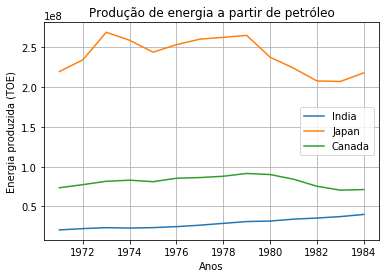

In [386]:
plt.plot(oil.loc['India'], label = 'India')
plt.plot(oil.loc['Japan'], label = 'Japan')
plt.plot(oil.loc['Canada'], label = 'Canada')
plt.title('Produção de energia a partir de petróleo')
plt.xlabel('Anos')
plt.ylabel('Energia produzida (TOE)')
plt.grid(True)
plt.legend()

**Dados sobre a energia total usada por país (TOE)**

In [387]:
dados_energy_use_total = pd.read_excel('energy_use_total.xlsx')
dados_energy_use_total.head(3)

,"Energe use, total (toe)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
energy_use_total = dados_energy_use_total.set_index('Energe use, total (toe)')
energy_use_total = energy_use_total.iloc[:,11:25]
energy_use_total.index.names = ['country']
energy_use_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1717818.0,1941633.0,1751543.0,1825619.0,1988411.0,2190349.0,2321677.0,2593840.0,2262329.0,3071557.0,2696615.0,2691515.0,2844307.0,2957473.0
Algeria,3467088.0,4023298.0,4825133.0,5189237.0,5523503.0,6303561.0,7055381.0,8686419.0,11003456.0,11208612.0,12185743.0,15872317.0,17152852.0,17000866.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,3850748.0,4145619.0,4130688.0,4219849.0,4120914.0,4072554.0,4015100.0,4416958.0,4478234.0,4563057.0,4593167.0,4530724.0,4656722.0,4704760.0
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
energy_use_total = energy_use_total[~energy_use_total[1971].isin(['NaN'])]
energy_use_total = energy_use_total.sort_values(by=1971, ascending=False)
energy_use_total = energy_use_total.loc[['India','Japan','Canada'],:]
energy_use_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
India,156464804.0,160128825.0,164473626.0,171376208.0,177729528.0,185060084.0,190216072.0,190959893.0,199922784.0,205154559.0,216022695.0,224639961.0,232102715.0,242206681.0
Japan,267528465.0,285875407.0,320368660.0,322140756.0,305054335.0,324419709.0,330191794.0,333013333.0,352714403.0,344522706.0,336976512.0,336467940.0,336770462.0,362191060.0
Canada,141352607.0,152495184.0,159345776.0,161708500.0,165946829.0,171035832.0,176317176.0,181203629.0,190277534.0,192608778.0,187802540.0,180461216.0,179535267.0,188707639.0


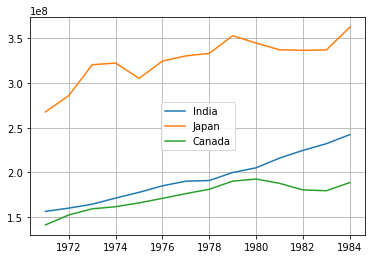

In [390]:
plt.plot(energy_use_total.loc['India'], label = 'India')
plt.plot(energy_use_total.loc['Japan'], label = 'Japan')
plt.plot(energy_use_total.loc['Canada'], label = 'Canada')
plt.grid(True)
plt.legend()